In [ ]:
# Calculates overlap integral based on circular or hexagonal subapertures

In [41]:
import poppy
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

In [2]:
## BEGIN USER-DEFINED QUANTITIES

f_lens = 185 # focal length of lens, in um

# pixel scale of 'detector' (plane of waveguide entrance)
scale_det = 0.2161 # um/pix

## END USER-DEFINED QUANTITIES

In [3]:
# set scale of apertures of all modeled subaperture shapes

# pixel scale in terms of arcsec/pix
pixelscale = (scale_det/f_lens)*206265. # (0.2161um/f [um] )*206265 arcsec /pix

## Circular pupil: set up optics and calculate PSF (wavefront implicit)

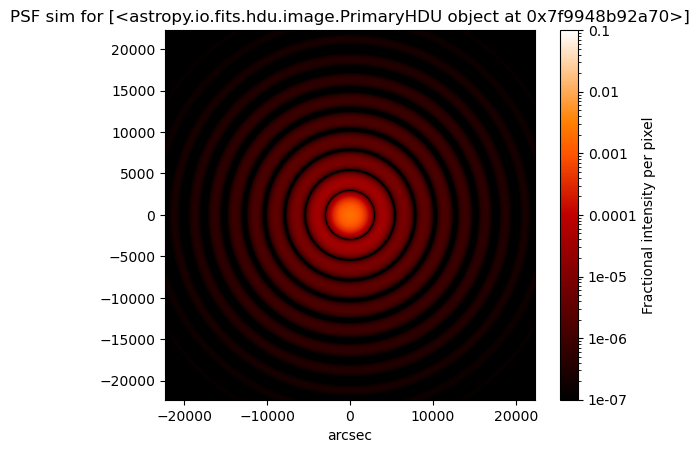

In [4]:
# circular pupil

# define aperture
#aper_circ = poppy.CircularAperture(radius=66.*u.micron)

# construct system
osys_circ = poppy.OpticalSystem()

aper_circ = osys_circ.add_pupil( poppy.CircularAperture(radius=66.*u.micron) )

lens = osys_circ.add_pupil( poppy.ThinLens(name='lenslet', nwaves=0, radius=66.*u.micron) )

# 44600 arcsec FOV means 40 um on each edge
det = osys_circ.add_detector(pixelscale=pixelscale, fov_arcsec=44600*u.arcsec)  # image plane coordinates in arcseconds

psf = osys_circ.calc_psf(wavelength=1.550*u.micron)

#osys_circ.display()

poppy.display_psf(psf)

# Explicitly set up wavefront and propagate to optical elements

In [36]:
wf = poppy.Wavefront(wavelength=1.550*u.micron, npix=1024, diam=66.*u.micron) #400*u.micron)
wf.propagate_to(lens)
wf.propagate_to(det)

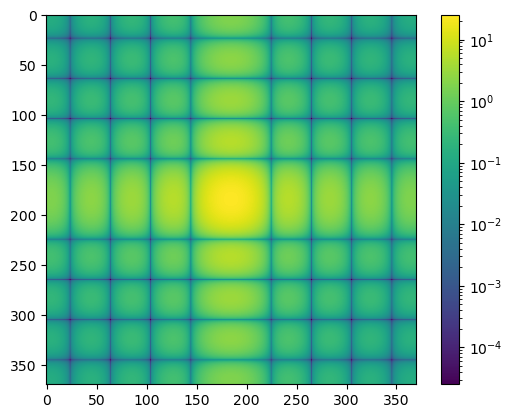

In [37]:
plt.imshow(wf.amplitude, norm='log')
plt.colorbar()
plt.show()

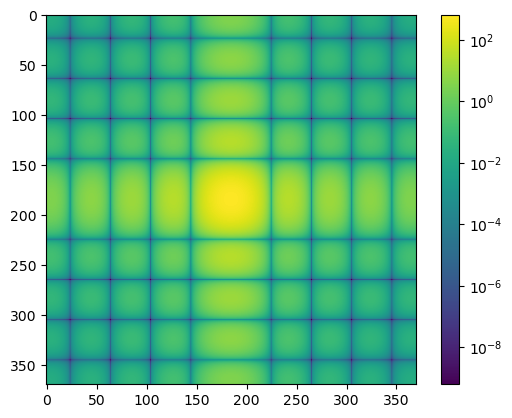

In [35]:
plt.imshow(wf.intensity, norm='log')
plt.colorbar()
plt.show()